In [60]:
import os
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import EnglishStemmer
import seaborn as sns
import matplotlib.pyplot as plt

stemmer = EnglishStemmer()
#nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/oso/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

We chose the 20news-bydate dataset because it is already divided in 60% for training and 40% for testing which we can take 10% of the testing set for validation. Also this dataset is divided in training and testing by date, which eliminates the randomness in the selection of the sets making it easier for the cross-experiment comparison as mentioned in the webpage where this dataset is.

In [20]:
NEWS_TRAIN_FOLDER = '20news-bydate/20news-bydate-train/'
NEWS_TEST_FOLDER = '20news-bydate/20news-bydate-test/'

news_train = []
for folder in os.listdir(NEWS_TRAIN_FOLDER):
    for document in os.listdir(NEWS_TRAIN_FOLDER + folder):
        with open(NEWS_TRAIN_FOLDER + folder + '/' + document, 'r', encoding='utf-8', errors='ignore') as file:
            text = file.read()
            news_train.append({'category': folder, 'text': text})

df_news_train = pd.DataFrame(news_train)
df_news_train.head(5)


,category,text
0,sci.crypt,From: koontzd@phobos.lrmsc.loral.com (David Ko...
1,sci.crypt,From: gtoal@gtoal.com (Graham Toal)\nSubject: ...
2,sci.crypt,From: tcmay@netcom.com (Timothy C. May)\nSubje...
3,sci.crypt,From: artmel@well.sf.ca.us (Arthur Melnick)\nS...
4,sci.crypt,From: amolitor@nmsu.edu (Andrew Molitor)\nSubj...


In [21]:
df_news_train.shape

(11314, 2)

/home/oso/dev/NLP_HW2/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/oso/dev/NLP_HW2/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/oso/dev/NLP_HW2/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/oso/dev/NLP_HW2/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

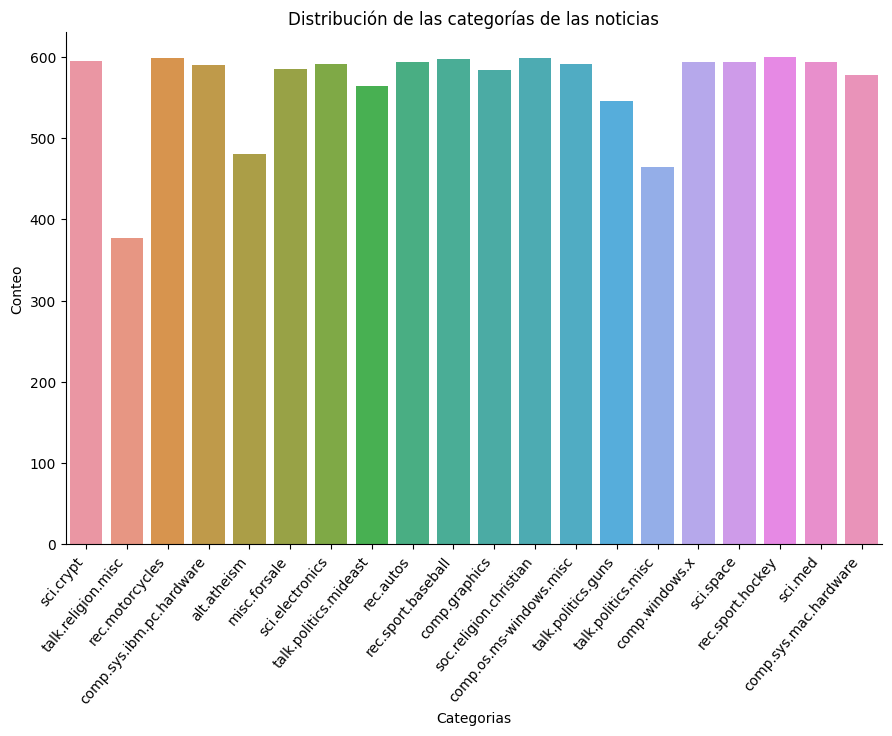

In [37]:
sns.catplot(x='category', kind='count', data=df_news_train)
plt.title('Distribución de las categorías de las noticias')
plt.xlabel('Categorias')
plt.ylabel('Conteo')
plt.xticks(rotation=45)
plt.gcf().set_size_inches(12, 6)
# Show the name of the categories with rotation 45 and shifted to the left
plt.xticks(range(20), df_news_train['category'].unique(), rotation=50, ha='right')
plt.show()

Classes are relatively balanced in terms of documents per class, which is good for the training of the classifier. The only classes with less that 500 documents are talk.religion.misc, alt.atheism and talk.politics.misc.

#### Text Processing

In [63]:
def text_processing(text):
    # Step 1: Remove all the lines before the news real content
    lines = str(text).splitlines()
    i = 0
    processed_text = ''
    while i < len(lines):
        if lines[i] == '':
            processed_text = ' '.join(lines[i + 1:])
            break
        i += 1
    # Step 2: Remove all the special characters (maintain only words)
    processed_text = re.sub(r'\W', ' ', processed_text)
    # Step 3: Remove all single characters
    processed_text = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_text)
    # Step 4: Remove single characters from the start
    processed_text = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_text)
    # Step 5: Substituting multiple spaces with single space
    processed_text = re.sub(r'\s+', ' ', processed_text)
    # Step 6: Lowercase
    processed_text = processed_text.lower()
    # Step 7: Stemming
    processed_text = " ".join([stemmer.stem(word) for word in processed_text.split()])
    return processed_text



In [69]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [71]:
text_for_processing = df_news_train['text'].values
labels = df_news_train['category'].values

processed_texts = []
for text in text_for_processing:
    processed_texts.append(text_processing(text))

In [72]:
print("Original:")
print(df_news_train['text'][121][:500], "...")
print("-----------------------------------\nProcessed:")
print(processed_texts[121][:500], "...")

Original:
From: amanda@intercon.com (Amanda Walker)
Subject: Re: Screw the people, crypto is for hard-core hackers & spooks 
	only
Organization: InterCon Systems Corporation - Herndon, VA  USA
Lines: 35
Distribution: world
Reply-To: amanda@intercon.com (Amanda Walker)
NNTP-Posting-Host: chaos.intercon.com
X-Newsreader: InterCon TCP/Connect II 1.1

jhart@agora.rain.com (Jim Hart) writes:
> You don't care that people are being lied to, fooled into believing the 
> chip gives "privacy" when it fact it allows ...
-----------------------------------
Processed:
jhart agora rain com jim hart write you don care that peopl are be lie to fool into believ the chip give privaci when it fact it allow wiretap it doe give privaci just not absolut privaci the announc was veri up front about this and about allow wiretap how is this fool anyon are you so smart that you know when you re talk to somebodi who has wiretap chip on their phone instead of privaci chip with privat key sure the two don interoper